In [45]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

In [46]:
def savefig_pdf(fig, filename, dpi=300):
    fig.savefig(f"{filename}.pdf", dpi=dpi)

In [47]:
res = 40
theta = np.linspace(0, np.pi, res)
phi = np.linspace(0, 2 * np.pi, res)
THETA, PHI = np.meshgrid(theta, phi)
R = 1
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

x = np.cos(phi)
y = np.sin(phi)
z = np.zeros(len(phi))

In [48]:
theta0 = np.pi / 3
phi0 = np.pi / 6

def generate_pvs(n, s, dphi):
    # x0 = np.array([np.sin(theta0) * np.cos(phi0 + dphi), np.sin(theta0) * np.sin(phi0 + dphi), np.cos(theta0)])
    # x1 = np.array([np.sin(theta0) * np.cos(phi0 - dphi), np.sin(theta0) * np.sin(phi0 - dphi), np.cos(theta0)])
    posi_thetas = theta0 + (2 * np.random.rand(n) - 1) * s
    posi_phis = phi0 + dphi + (2 * np.random.rand(n) - 1) * s
    nega_phis = phi0 - dphi + (2 * np.random.rand(n) - 1) * s
    nega_thetas = posi_thetas

    posi_pvs = np.array([np.sin(posi_thetas) * np.cos(posi_phis), np.sin(posi_thetas) * np.sin(posi_phis), np.cos(posi_thetas)])
    nega_pvs = np.array([np.sin(nega_thetas) * np.cos(nega_phis), np.sin(nega_thetas) * np.sin(nega_phis), np.cos(nega_thetas)])
    return posi_pvs, nega_pvs

def plot_sp_pvs(posi_pvs, nega_pvs, axis=False, savename=None):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection="3d")
    ax.view_init(elev=30, azim=25)
    ax.axis("off")
    # # 軸
    if axis:
        plot_3axis(ax)

    # 球面
    ax.plot(x, y, z, alpha=0.5, color="k")
    ax.plot_surface(X, Y, Z, alpha=0.05, color="c")

    # ax.scatter(*x0, c="k")
    # ax.scatter(*x1, c="b")
    ax.scatter(*posi_pvs, c="crimson")
    ax.scatter(*nega_pvs, c="deepskyblue")

    if savename is not None:
        savefig_pdf(fig, savename)

In [49]:
n = 5

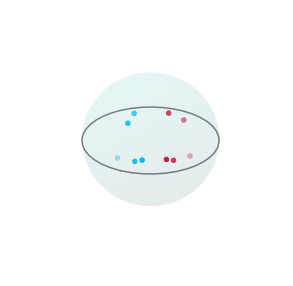

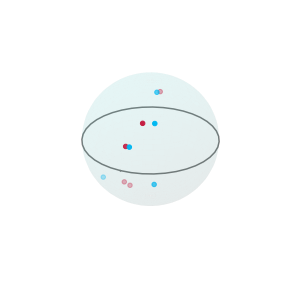

In [50]:
s = 0.4
dphi = np.pi / 6
posi_pvs_h, nega_pvs_h = generate_pvs(n, s, dphi)
plot_sp_pvs(posi_pvs_h, nega_pvs_h, savename="../data/high_energy_pv_configuration")

plt.show()

s = 0.8
dphi = np.pi / 24
posi_pvs_l, nega_pvs_l = generate_pvs(n, s, dphi)
plot_sp_pvs(posi_pvs_l, nega_pvs_l, savename="../data/low_energy_pv_configuration")

In [51]:
theta1 = np.pi / 6
phi1 = np.pi / 3

r_y = np.array(
            [
                [np.cos(theta1), 0.0, np.sin(theta1)],
                [0.0, 1.0, 0.0],
                [-np.sin(theta1), 0.0, np.cos(theta1)],
            ]
        )
r_z = np.array(
            [
                [np.cos(phi1), -np.sin(phi1), 0.0],
                [np.sin(phi1), np.cos(phi1), 0.0],
                [0.0, 0.0, 1.0],
            ]
        )
R = (r_z @ r_y).T

In [91]:
def plot_poled_pvs(x1, x2, x3, x4, axis=False, savename=None):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection="3d")
    ax.view_init(elev=30, azim=25)
    ax.axis("off")
    # # 軸
    if axis:
        plot_3axis(ax)

    # 球面
    ax.plot(x, y, z, alpha=0.5, color="k")
    ax.plot_surface(X, Y, Z, alpha=0.05, color="c")

    ax.scatter(*x1, c="crimson", alpha=0.2)
    ax.scatter(*x2, c="crimson")
    ax.scatter(*x3, c="deepskyblue")
    ax.scatter(*x4, c="deepskyblue")

    ax.text(*x1 + 0.1, "$ x_1 $")
    ax.text(*x2 + 0.1, "$ x_2 $")
    ax.text(*x3 + 0.1, "$ x_3 $")
    ax.text(*x4 + 0.1, "$ x_4 $")

    if savename is not None:
        savefig_pdf(fig, savename)

In [94]:
x1 = [np.sin(theta1)*np.cos(phi1), np.sin(theta1)*np.sin(phi1), np.cos(theta1)]
posi_pvs, nega_pvs = generate_pvs(2, s = 1, dphi=1)
posi_pvs[:, 0] = x1

posi_pvs_poled = R @ posi_pvs
nega_pvs_poled = R @ nega_pvs

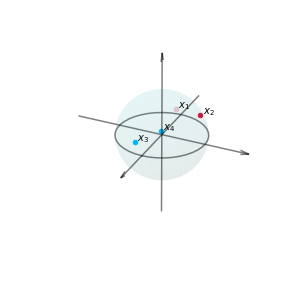

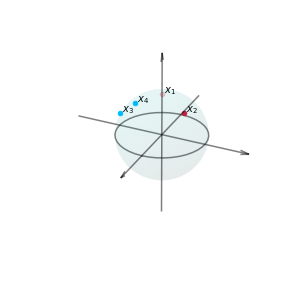

In [96]:
plot_poled_pvs(posi_pvs.T[0], posi_pvs.T[1], nega_pvs.T[0], nega_pvs.T[1], axis=True, savename="../data/4pv_configuration")
plot_poled_pvs(posi_pvs_poled.T[0], posi_pvs_poled.T[1], nega_pvs_poled.T[0], nega_pvs_poled.T[1], axis=True, savename="../data/4pv_configuration_poled")